--------------------------------------------------
--- Time Remaining (In Seconds) Membership Function Results:
- player_time_remaining_in_seconds: 11.89
- low_time_remaining: 62.20%
- moderate_time_remaining: 37.80%
- high_time_remaining: 0.00%

--------------------------------------------------
--- Board Evaluation Membership Function Results:
- board_evaluation: 1.40
- black_advantage: 0.00%
- draw: 30.00%
- white_advantage: 40.00%

--------------------------------------------------
--- Defuzzified Results:
- Combined Memberships:
[0.     0.0756 0.1512 0.2268 0.3024 0.378  0.3402 0.3024 0.2646 0.2268
 0.189  0.2268 0.2646 0.3024 0.3402 0.378  0.3402 0.3024 0.2646 0.2268
 0.2    0.24   0.28   0.32   0.36   0.4    0.32   0.24   0.16   0.08
 0.    ]
- Defuzzified Tip Percentage: 15.17%



c:\Users\Dell\OneDrive\workspace\projects\work_in_progress\Fuzzy-Eval\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


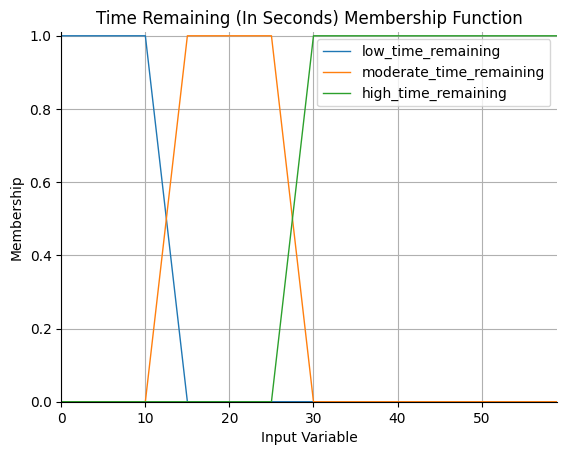

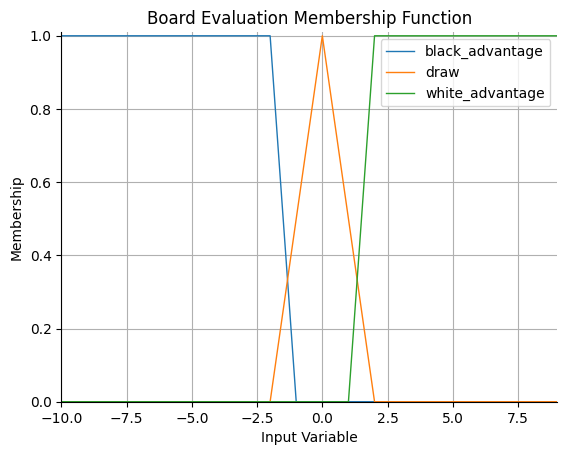

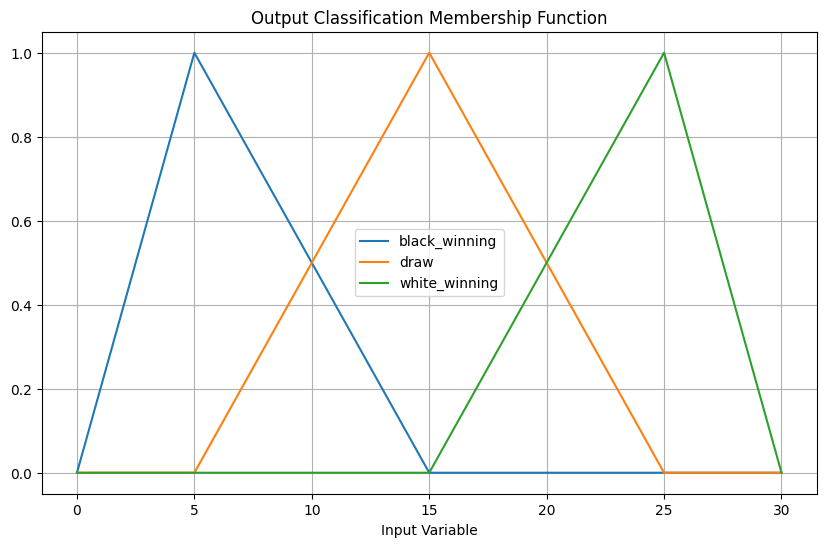

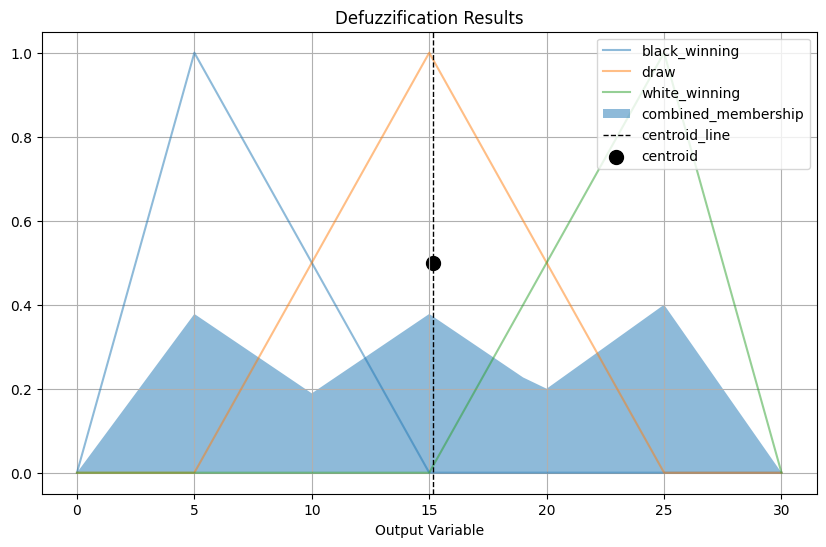

In [3]:
import numpy
import skfuzzy
from skfuzzy import control
import matplotlib.pyplot as pyplot

# Input Variables
player_time_remaining_in_seconds = 11.89
board_evaluation = 1.4


# Time Remaining (In Seconds) Membership Function
time_remaining = control.Antecedent(numpy.arange(0, 60, 1), 'time_remaining')

low_time_remaining = [0, 0, 10, 15]
time_remaining['low_time_remaining'] = skfuzzy.trapmf(time_remaining.universe, low_time_remaining)
low_time_remaining_membership = skfuzzy.trapmf(time_remaining.universe, low_time_remaining)
low_time_remaining_value = numpy.interp(player_time_remaining_in_seconds, time_remaining.universe, low_time_remaining_membership)

moderate_time_remaining = [10, 15, 25, 30]
time_remaining['moderate_time_remaining'] = skfuzzy.trapmf(time_remaining.universe, moderate_time_remaining)
moderate_time_remaining_membership = skfuzzy.trapmf(time_remaining.universe, moderate_time_remaining)
moderate_time_remaining_value = numpy.interp(player_time_remaining_in_seconds, time_remaining.universe, moderate_time_remaining_membership)

high_time_remaining = [25, 30, 60, 60]
time_remaining['high_time_remaining'] = skfuzzy.trapmf(time_remaining.universe, high_time_remaining)
high_time_remaining_membership = skfuzzy.trapmf(time_remaining.universe, high_time_remaining)
high_time_remaining_value = numpy.interp(player_time_remaining_in_seconds, time_remaining.universe, high_time_remaining_membership)


# Player Board Evaluation Membership Function
player_board_evaluation = control.Antecedent(numpy.arange(-10, 10, 1), 'player_board_evaluation')

black_advantage = [-10, -10, -2, -1]
player_board_evaluation['black_advantage'] = skfuzzy.trapmf(player_board_evaluation.universe, black_advantage)
black_advantage_membership = skfuzzy.trapmf(player_board_evaluation.universe, black_advantage)
black_advantage_value = numpy.interp(board_evaluation, player_board_evaluation.universe, black_advantage_membership)

draw = [-2, 0, 0, 2]
player_board_evaluation['draw'] = skfuzzy.trapmf(player_board_evaluation.universe, draw)
draw_membership = skfuzzy.trapmf(player_board_evaluation.universe, draw)
draw_value = numpy.interp(board_evaluation, player_board_evaluation.universe, draw_membership)

white_advantage = [1, 2, 10, 10]
player_board_evaluation['white_advantage'] = skfuzzy.trapmf(player_board_evaluation.universe, white_advantage)
high_membership = skfuzzy.trapmf(player_board_evaluation.universe, white_advantage)
white_advantage_value = numpy.interp(board_evaluation, player_board_evaluation.universe, high_membership)


# Classification Membership Function
class_value = numpy.arange(0, 31, 1)

black_winning_representation = [0, 5, 15]
black_winning_graph = skfuzzy.trimf(class_value, black_winning_representation)    

draw_representation = [5,15,25]
draw_graph = skfuzzy.trimf(class_value, draw_representation) 

white_winning_representation = [15,25,30]
white_winning_graph = skfuzzy.trimf(class_value, white_winning_representation)  


# Fuzzy Rules and Fuzzification
black_winning_rule = numpy.maximum(moderate_time_remaining_value, black_advantage_value)
draw_rule = numpy.maximum(moderate_time_remaining_value, draw_value)
white_winning_rule = numpy.maximum(moderate_time_remaining_value, white_advantage_value)


# Defuzzification
combined_membership = numpy.fmax(black_winning_graph * black_winning_rule, numpy.fmax(draw_graph * draw_rule, white_winning_graph * white_winning_rule))
defuzzified_value = skfuzzy.defuzz(class_value, combined_membership, 'centroid')


# Graphical Results
# Time Remaining (In Seconds) Membership Function
print('-' * 50)
print('--- Time Remaining (In Seconds) Membership Function Results:')
print(f'- player_time_remaining_in_seconds: {player_time_remaining_in_seconds:.2f}')
print(f'- low_time_remaining: {low_time_remaining_value * 100:.2f}%')
print(f'- moderate_time_remaining: {moderate_time_remaining_value * 100:.2f}%')
print(f'- high_time_remaining: {high_time_remaining_value * 100:.2f}%\n')

# Player Board Evaluation Membership Function
print('-' * 50)
print('--- Board Evaluation Membership Function Results:')
print(f'- board_evaluation: {board_evaluation:.2f}')
print(f'- black_advantage: {black_advantage_value * 100:.2f}%')
print(f'- draw: {draw_value * 100:.2f}%')
print(f'- white_advantage: {white_advantage_value * 100:.2f}%\n')

# Defuzzification
print('-' * 50)
print('--- Defuzzified Results:')
print('- Combined Memberships:')
print(f'{combined_membership}')
print(f'- Defuzzified Tip Percentage: {defuzzified_value:.2f}%\n')

# Time Remaining (In Seconds) Membership Function
time_remaining.view()
pyplot.title('Time Remaining (In Seconds) Membership Function')
pyplot.xlabel('Input Variable')
pyplot.legend()
pyplot.grid()

# Player Board Evaluation Membership Function
player_board_evaluation.view()
pyplot.title('Board Evaluation Membership Function')
pyplot.xlabel('Input Variable')
pyplot.legend()
pyplot.grid()

# Classification Membership Function
pyplot.figure(figsize=(10, 6))
pyplot.plot(class_value, black_winning_graph, label='black_winning')
pyplot.plot(class_value, draw_graph, label='draw')
pyplot.plot(class_value, white_winning_graph, label='white_winning')
pyplot.title('Output Classification Membership Function')
pyplot.xlabel('Input Variable')
pyplot.legend()
pyplot.grid()
pyplot.show()

# Defuzzification
pyplot.figure(figsize=(10, 6))
pyplot.plot(class_value, black_winning_graph, label='black_winning', alpha=0.5)
pyplot.plot(class_value, draw_graph, label='draw', alpha=0.5)
pyplot.plot(class_value, white_winning_graph, label='white_winning', alpha=0.5)
pyplot.fill_between(class_value, combined_membership, label='combined_membership', alpha=0.5)
pyplot.axvline(x=defuzzified_value, label='centroid_line', color='black', linestyle='dashed', linewidth=1)
pyplot.scatter([defuzzified_value], [0.5], label='centroid_point', s=100, color='black', marker='o')
pyplot.title('Defuzzification Results')
pyplot.xlabel('Output Variable')
pyplot.legend()
pyplot.grid()
pyplot.show()


